# Evaluation System- Step 2

### Step 2 — Pixel Accuracy (GT vs Prediction)

**Goal:**  
This step measures how close the model's tracked keypoints are to human-labeled ground truth (GT).  
We do this per camera, per node, and per frame.

---

#### How matching works
1. We load:
   - Model predictions from each `*.analysis.h5` file (one per camera).
   - Manual labels from either a `.slp` file or CSV(s).

2. We match points by:
   - Camera (which camera the label came from),
   - Node (which landmark, e.g. `UpperLip_Center`),
   - Frame index.

3. Because the GT and predictions might be slightly time-shifted, we automatically search for the best frame offset (e.g. GT frame `t` ↔ prediction frame `t+offset`) across a small window.

If we can’t match anything, we stop and print diagnostics.

---

#### What we compute
For every matched keypoint:
- `pixel error (err_px)` = Euclidean distance between GT (x,y) and predicted (x,y), in pixels.

From that we build:

1. `error_by_frame.csv`
   - Each row = (camera, frame, node, err_px).
   - Raw per-sample error.

2. `pixel_error_stats_by_cam_node.csv`
   - Summary stats for each (camera, node):
     - `mean_px`: average pixel error.
     - `median_px`: median pixel error.
     - `p95_px`: 95th percentile error.
     - `std_px`: spread.
     - `count`: number of matched samples.
   - Lower is better.

3. `pck_table.csv`
   - PCK = “Percentage of Correct Keypoints.”
   - For each pixel threshold (2px, 3px, 5px, 7px, 10px), we ask:
     - What fraction of keypoints were within that many pixels of GT?
   - Higher is better.

4. `pck_auc.json`
   - We summarize the PCK curve into an AUC value (`pck_auc`) across the tested thresholds.
   - We also store the `best_frame_offset` (the sync shift that gave max matches).

---

#### Plots we save
1. `pck_curve_overall.png`
   - Curve of PCK vs pixel threshold.
   - Title also shows AUC and the chosen frame offset.

2. `per_node_error_boxplot.png`
   - Boxplot of pixel errors for each node (all cameras combined).
   - Lets you see which landmarks are stable vs noisy.

---

#### How to interpret
- High PCK at low thresholds (e.g. ≥80% within 3 px) = very accurate tracking.
- Low median / low p95 in `pixel_error_stats_by_cam_node.csv` = node is consistently good.
- Nodes with huge spread or high p95 are unreliable or flickery.
- The per-node boxplot makes it visually obvious which landmarks are weakest.

In short:  
Step 1 told us **“how often do we see the node?”**  
Step 2 tells us **“when we see it, how correct is it in pixels?”**


[diag] Prediction cams: ['labels.v003.000_cam-bottomleft.analysis.h5', 'labels.v003.001_cam-bottomright.analysis.h5', 'labels.v003.002_cam-topleft.analysis.h5', 'labels.v003.003_cam-topright.analysis.h5']
[diag] Prediction nodes: ['U_star', 'L_star', 'Head_A', 'Head_B', 'Head_C']
[diag] GT from SLP: rows=250, video_idx counts: {2: 80, 3: 70, 0: 65, 1: 35}
video_idx → cam: {0: 'labels.v003.000_cam-bottomleft.analysis.h5', 1: 'labels.v003.001_cam-bottomright.analysis.h5', 2: 'labels.v003.002_cam-topleft.analysis.h5', 3: 'labels.v003.003_cam-topright.analysis.h5'}
[diag] Best frame offset = +1 → matches=250, bad_node=0, bad_frame=0, pred_nan=0, score_fail=0
[OK] wrote:
  ../results\Sleap evaluation\metrics_step2\error_by_frame.csv
  ../results\Sleap evaluation\metrics_step2\pixel_error_stats_by_cam_node.csv
  ../results\Sleap evaluation\metrics_step2\pck_table.csv
  ../results\Sleap evaluation\metrics_step2\pck_auc.json


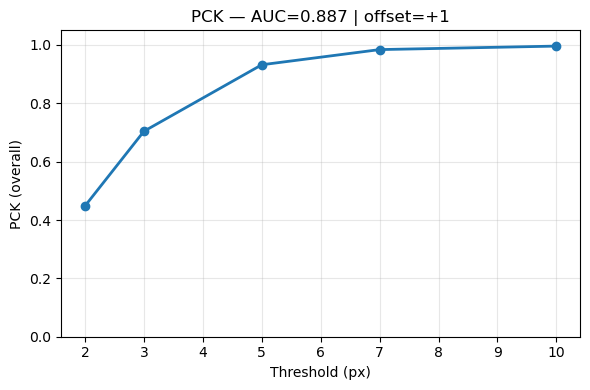

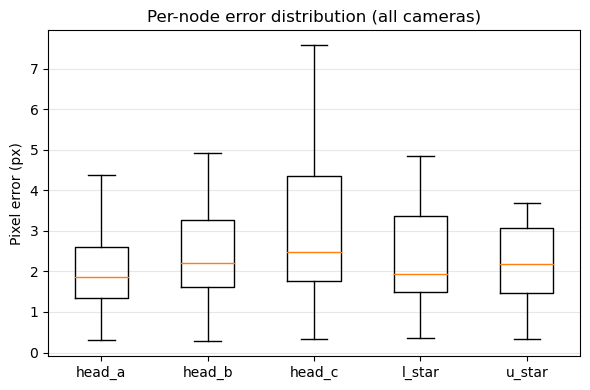

,cam,node,level_2,err_px
0,labels.v003.000_cam-bottomleft.analysis.h5,head_a,count,13.000000
1,labels.v003.000_cam-bottomleft.analysis.h5,head_a,mean_px,1.756008
2,labels.v003.000_cam-bottomleft.analysis.h5,head_a,median_px,1.704256
3,labels.v003.000_cam-bottomleft.analysis.h5,head_a,std_px,1.159851
4,labels.v003.000_cam-bottomleft.analysis.h5,head_a,p95_px,3.508904


,threshold_px,pck_overall,labels.v003.000_cam-bottomleft.analysis.h5::head_a,labels.v003.000_cam-bottomleft.analysis.h5::head_b,labels.v003.000_cam-bottomleft.analysis.h5::head_c,labels.v003.000_cam-bottomleft.analysis.h5::l_star,labels.v003.000_cam-bottomleft.analysis.h5::u_star,labels.v003.001_cam-bottomright.analysis.h5::head_a,labels.v003.001_cam-bottomright.analysis.h5::head_b,labels.v003.001_cam-bottomright.analysis.h5::head_c,...,labels.v003.002_cam-topleft.analysis.h5::head_a,labels.v003.002_cam-topleft.analysis.h5::head_b,labels.v003.002_cam-topleft.analysis.h5::head_c,labels.v003.002_cam-topleft.analysis.h5::l_star,labels.v003.002_cam-topleft.analysis.h5::u_star,labels.v003.003_cam-topright.analysis.h5::head_a,labels.v003.003_cam-topright.analysis.h5::head_b,labels.v003.003_cam-topright.analysis.h5::head_c,labels.v003.003_cam-topright.analysis.h5::l_star,labels.v003.003_cam-topright.analysis.h5::u_star
0,2,0.448,0.615385,0.230769,0.307692,0.538462,0.307692,0.285714,0.285714,0.285714,...,0.5000,0.5000,0.3750,0.50,0.4375,0.714286,0.500000,0.357143,0.428571,0.428571
1,3,0.704,0.923077,0.538462,0.615385,0.769231,0.538462,0.857143,0.428571,0.714286,...,0.8125,0.7500,0.6250,0.75,0.9375,0.928571,0.571429,0.428571,0.571429,0.785714
2,5,0.932,1.000000,1.000000,0.769231,0.846154,0.846154,0.857143,1.000000,1.000000,...,1.0000,0.9375,0.8125,1.00,1.0000,1.000000,0.928571,0.857143,0.928571,0.928571
3,7,0.984,1.000000,1.000000,0.923077,0.923077,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.0000,1.0000,1.00,1.0000,1.000000,1.000000,0.928571,1.000000,0.928571
4,10,0.996,1.000000,1.000000,1.000000,0.923077,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.0000,1.0000,1.00,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# === STEP 2 (final, compact): Pixel Error & PCK from manual SLP *or* CSV ===
# Outputs: error_by_frame.csv, pixel_error_stats_by_cam_node.csv, pck_table.csv, pck_auc.json,
#          pck_curve_overall.png, per_node_error_boxplot.png

# ---------- EDIT THESE ----------
session_dir = r"../data/phase1_sample"            # folder with *.analysis.h5 (predictions)
out_root    = r"../results"

# Choose ONE ground-truth source:
gt_slp_path        = r"../data/phase1_sample\labels.v002.slp"   # manual labels .slp
gt_csv_path_or_dir = ""  # leave "" when using SLP; otherwise set to CSV file or folder

# Params
pck_thresholds_px        = [2, 3, 5, 7, 10]
score_thresh_for_pred_ok = 0.0     # ignore predictions with score <= this (if scores exist)
search_window_frames     = 10      # frame offset search range [-W .. +W]
frame_offset_override    = None    # e.g. 1 to skip auto-search; else None
# --------------------------------

import os, re, glob, json, math, warnings
import numpy as np, pandas as pd, h5py
import matplotlib.pyplot as plt
from typing import Optional

# ---------- helpers ----------
def _maybe_decode(x):
    return x.decode("utf-8", errors="ignore") if isinstance(x, (bytes, bytearray, np.bytes_)) else str(x)

def normalize_names(names):
    return [str(n).strip().lower() for n in names]

def find_cam_h5s(session_dir: str):
    h5s = sorted(glob.glob(os.path.join(session_dir, "*.analysis.h5")))
    if not h5s:
        raise RuntimeError(f"No *.analysis.h5 files found in {session_dir}")
    return {os.path.basename(p): p for p in h5s}

def load_sleap_analysis_h5(path: str, score_gate: float):
    """Return pts(T,N,2), node_names(list), scores(T,N or None), fps."""
    with h5py.File(path, "r") as f:
        fps = None
        for k in ["video_fps","videos/fps","video/fps"]:
            if k in f:
                v = np.array(f[k]); fps = float(v[0] if np.size(v) else v); break

        node_names = None
        for k in ["node_names","nodes","points/labels"]:
            if k in f:
                node_names = [_maybe_decode(a) for a in np.array(f[k]).ravel()]
                break

        ds = None
        for cand in ["tracks","pred_points","points"]:
            if cand in f: ds = f[cand]; break
        if ds is None: raise RuntimeError(f"No predicted points dataset found in {path}")
        arr = np.array(ds)

        # normalize to (K,T,N,2)
        if arr.ndim == 4:
            s = arr.shape
            if s[1]==2 and s[-1]>50: arr = arr.transpose(0,3,2,1)
            elif s[2]==2 and s[0]>50: arr = arr.transpose(3,0,1,2)
            elif s[-1]==2: pass
            elif s[0]==2: arr = arr.transpose(3,2,1,0)
            else:
                dims=list(s); coord_ax=int(np.where(np.array(dims)==2)[0][0]); frame_ax=int(np.argmax(dims))
                cands=[i for i in range(4) if i not in (coord_ax,frame_ax)]
                k_ax=cands[int(np.argmin([dims[i] for i in cands]))]
                n_ax=[i for i in range(4) if i not in (coord_ax,frame_ax,k_ax)][0]
                arr = arr.transpose(k_ax, frame_ax, n_ax, coord_ax)
        elif arr.ndim==3 and arr.shape[-1]==2:
            arr = arr[None, ...]
        else:
            raise RuntimeError(f"Unrecognized array shape {arr.shape}")

        K,T,N,_ = arr.shape

        # best track via occupancy if present
        kbest = 0
        for k in ["track_occupancy","tracks_occupancy","occupancy"]:
            if k in f:
                o = np.array(f[k])
                if o.ndim==3: occ=o.reshape(K,T,-1).max(-1)
                elif o.ndim==2: occ=o if o.shape[0]==K else o.T
                else: occ=None
                if occ is not None: kbest = int(np.argmax(occ.sum(axis=1)))
                break

        pts = arr[kbest].astype(float)  # (T,N,2)

        # optional scores -> (T,N)
        scores=None
        for k in ["point_scores","points_scores","node_scores","point_confidences","scores"]:
            if k not in f: continue
            sc = np.array(f[k])
            if sc.ndim==4 and sc.shape[0]==K: sc=sc[kbest]
            sc = np.squeeze(sc)
            TT,NN = pts.shape[0], pts.shape[1]
            if sc.ndim==3 and sc.shape[-1] in (1,2): sc = sc[...,0]
            elif sc.ndim==2:
                if sc.shape==(NN,TT): sc=sc.T
                elif sc.shape!=(TT,NN): sc=None
            elif sc.ndim==1:
                if sc.shape[0]==NN: sc = np.tile(sc[None,:], (TT,1))
                elif sc.shape[0]==TT: sc = np.tile(sc[:,None], (1,NN))
                else: sc=None
            else: sc=None
            if sc is not None:
                bad = ~np.isfinite(sc) | (sc<=score_gate)
                pts[bad] = np.nan
                scores = sc
            break

        if node_names is None:
            node_names=[f"node_{i}" for i in range(pts.shape[1])]
        return pts, node_names, scores, fps

# ----- read manual SLP to GT DataFrame -----
def _as_str_list(ds):
    try: return [s for s in ds.asstr()[...]]
    except Exception:
        arr = np.array(ds); out=[]
        for v in arr.ravel():
            if isinstance(v, (bytes, bytearray, np.bytes_)):
                out.append(bytes(v).decode("utf-8", errors="ignore"))
            else:
                out.append(str(v))
        return out

def read_manual_slp_to_df(path):
    """Return DataFrame(video_idx, video, frame, node, node_lc, node_i, x, y) for manual instances."""
    # JSON SLP (rare)
    try:
        with open(path, "r", encoding="utf-8") as f:
            data = json.load(f)
        videos = data.get("videos", [])
        vnames = [os.path.basename(v.get("filename","") or v.get("backend","") or v.get("json","")) for v in videos]
        rows=[]
        frames = data.get("frames") or data.get("labels",{}).get("frames") or []
        for fr in frames:
            frame = int(fr.get("frame_idx") or fr.get("frameIndex") or fr.get("frame", 0))
            vid_i = fr.get("video") if isinstance(fr.get("video"), int) else fr.get("video_idx")
            for inst in fr.get("instances", []):
                is_pred = int(bool(inst.get("from_predicted", 0)))
                if is_pred != 0:   # keep only manual
                    continue
                pts = inst.get("points", []) or []
                for i,p in enumerate(pts):
                    x,y = p.get("x"), p.get("y")
                    if x is None or y is None: continue
                    name = p.get("name") or p.get("label") or f"node_{i}"
                    rows.append(dict(video_idx=vid_i,
                                     video=vnames[vid_i] if isinstance(vid_i,int) and 0<=vid_i<len(vnames) else None,
                                     frame=frame, node=name, node_lc=str(name).strip().lower(),
                                     node_i=i, x=float(x), y=float(y)))
        if rows: return pd.DataFrame(rows)
    except UnicodeDecodeError:
        pass  # HDF5 below

    # HDF5 SLP (typical)
    with h5py.File(path, "r") as f:
        for k in ["frames","instances","points"]:
            if k not in f: raise RuntimeError("This .slp lacks frames/instances/points groups.")
        frames    = f["frames"][...]
        instances = f["instances"][...]
        points    = f["points"][...]
        videos    = _as_str_list(f.get("videos_json", []))

        vnames=[]
        for s in videos:
            try:
                j=json.loads(s); vnames.append(os.path.basename(j.get("filename") or j.get("file") or j.get("path") or "")) 
            except Exception:
                vnames.append("video")

        vid_by_fid = {int(r["frame_id"]): int(r["video"]) for r in frames}
        fr_by_fid  = {int(r["frame_id"]): int(r["frame_idx"]) for r in frames}

        # optional node names (not strictly needed)
        node_names=None
        if "metadata" in f:
            meta=f["metadata"]
            for key in ("skeletons_json","skeleton_json","nodes_json"):
                if key in meta:
                    for txt in _as_str_list(meta[key]):
                        try: obj=json.loads(txt)
                        except Exception: continue
                        if isinstance(obj, dict) and "nodes" in obj:
                            node_names=[n.get("name", f"node_{i}") for i,n in enumerate(obj["nodes"])]
                            break
                        if isinstance(obj, list) and obj and isinstance(obj[0], dict) and "nodes" in obj[0]:
                            node_names=[n.get("name", f"node_{i}") for i,n in enumerate(obj[0]["nodes"])]
                            break
                    if node_names: break

        rows=[]
        for inst in instances:
            # manual only: SLEAP typically stores manual as -1, sometimes 0
            fp = int(inst["from_predicted"]) if "from_predicted" in instances.dtype.names else 0
            if fp not in (-1, 0):  # skip predicted
                continue
            fid   = int(inst["frame_id"])
            v_idx = vid_by_fid.get(fid, None)
            frame = fr_by_fid.get(fid, None)
            start = int(inst["point_id_start"]); end = int(inst["point_id_end"])
            pts   = points[start:end]

            names_this = node_names if (node_names is not None and len(node_names)==len(pts)) \
                         else [f"node_{i}" for i in range(len(pts))]
            for i,p in enumerate(pts):
                x=float(p["x"]); y=float(p["y"])
                if not (np.isfinite(x) and np.isfinite(y)): continue
                nm = names_this[i]
                rows.append(dict(video_idx=v_idx,
                                 video=vnames[v_idx] if v_idx is not None and 0<=v_idx<len(vnames) else None,
                                 frame=frame, node=nm, node_lc=str(nm).strip().lower(),
                                 node_i=i, x=x, y=y))
        if not rows: raise RuntimeError("Found 0 manual instances in this .slp.")
        return pd.DataFrame(rows)

# ----- GT from CSV (flex formats) -----
def _melt_wide_points(df, cam_from_file):
    fr_col = next((c for c in ["frame","frame_idx","frameindex","frame_id"] if c in df.columns), None)
    if fr_col is None: return None
    rows=[]
    dot_x = [c for c in df.columns if c.lower().endswith(".x")]
    for cx in dot_x:
        base = cx[:-2]; cy = base + ".y"
        if cy not in df.columns: continue
        for _,r in df[[fr_col,cx,cy]].dropna().iterrows():
            rows.append(dict(cam=cam_from_file, frame=int(r[fr_col]),
                             node=base, node_lc=str(base).strip().lower(),
                             x=float(r[cx]), y=float(r[cy])))
    if rows: return pd.DataFrame(rows)
    x_cols = [c for c in df.columns if re.match(r"(?i)^x[_:]", c)]
    for c in x_cols:
        node = re.sub(r"(?i)^(x[_:])", "", c).strip()
        ymatch = re.sub(r"(?i)^x", "y", c)
        if ymatch not in df.columns: continue
        for _,r in df[[fr_col,c,ymatch]].dropna().iterrows():
            rows.append(dict(cam=cam_from_file, frame=int(r[fr_col]),
                             node=node, node_lc=str(node).strip().lower(),
                             x=float(r[c]), y=float(r[ymatch])))
    if rows: return pd.DataFrame(rows)
    return None

def _parse_single_csv(path):
    cam_from_file = os.path.basename(path)
    m = re.search(r"cam-[^._]+", cam_from_file, flags=re.I)
    if m: cam_from_file = m.group(0)
    df = pd.read_csv(path)
    keep={}
    for extra in ["video_idx","node_i","node_idx","video","video_name","video_filename"]:
        if extra in df.columns: keep[extra]=df[extra].copy()

    cols = {c.lower():c for c in df.columns}
    node_col  = next((cols[c] for c in ["node","point","point_name","bodypart","label","name"] if c in cols), None)
    x_col     = next((cols[c] for c in ["x","x1","x_coord"] if c in cols), None)
    y_col     = next((cols[c] for c in ["y","y1","y_coord"] if c in cols), None)
    frame_col = next((cols[c] for c in ["frame","frame_idx","frameindex","frame_id"] if c in cols), None)
    video_col = next((cols[c] for c in ["cam","camera","video","video_filename","video_name","source_video","file","filename"] if c in cols), None)

    if all([node_col,x_col,y_col,frame_col]):
        out = df[[frame_col,node_col,x_col,y_col]].copy()
        out.columns = ["frame","node","x","y"]
        out["node_lc"] = out["node"].astype(str).str.strip().str.lower()
        out["frame"]   = out["frame"].astype(int)
        out["cam"]     = df[video_col].astype(str) if video_col else cam_from_file
        for k,v in keep.items(): out[k]=v
        return out[["cam","frame","node","node_lc","x","y"] + list(keep.keys())]

    wide = _melt_wide_points(df, cam_from_file)
    if wide is not None:
        for k,v in keep.items(): wide[k]=v
        return wide

    raise ValueError(f"CSV format not recognized for {path}.")

def load_gt_csv_flex(path_or_dir):
    if os.path.isdir(path_or_dir):
        csvs = sorted(glob.glob(os.path.join(path_or_dir, "*.csv")))
        if not csvs: raise ValueError(f"No CSV files in {path_or_dir}")
    else:
        csvs = [path_or_dir]
    parts=[]
    for p in csvs:
        try:
            parts.append(_parse_single_csv(p))
        except Exception as e:
            warnings.warn(f"Skipping {os.path.basename(p)}: {e}")
    if not parts: raise ValueError("No parsable CSVs for GT.")
    df = pd.concat(parts, axis=0, ignore_index=True)
    df["cam"] = df["cam"].astype(str)
    return df

# ---------- main ----------
def run_step2(
    session_dir: str,
    out_root: str,
    gt_slp_path: str = "",
    gt_csv_path_or_dir: str = "",
    pck_thresholds_px = [2,3,5,7,10],
    pred_score_thresh: float = 0.0,
    search_window_frames: int = 10,
    frame_offset_override: Optional[int] = None,
):
    # output dir
    session_name = os.path.basename(os.path.normpath(session_dir))
    m2 = os.path.join(out_root, session_name, "metrics_step2")
    os.makedirs(m2, exist_ok=True)

    # predictions
    cam_h5 = find_cam_h5s(session_dir)
    preds = {}
    node_names_ref = None
    for cam_key, h5p in cam_h5.items():
        pts, node_names, scores, fps = load_sleap_analysis_h5(h5p, score_gate=pred_score_thresh)
        if node_names_ref is None: node_names_ref = node_names
        else:
            if node_names_ref != node_names:
                raise AssertionError(f"Node order differs across cams: {list(cam_h5.keys())[0]} vs {cam_key}")
        preds[cam_key] = dict(pts=pts, names=node_names, scores=scores)
    print("[diag] Prediction cams:", list(preds.keys()))
    print("[diag] Prediction nodes:", node_names_ref)

    # GT
    if bool(gt_slp_path) == bool(gt_csv_path_or_dir):
        raise ValueError("Provide exactly one GT source: gt_slp_path OR gt_csv_path_or_dir.")
    if gt_slp_path:
        gt = read_manual_slp_to_df(gt_slp_path)
        print(f"[diag] GT from SLP: rows={len(gt)}, video_idx counts:", gt["video_idx"].value_counts().to_dict())
    else:
        gt = load_gt_csv_flex(gt_csv_path_or_dir)
        print(f"[diag] GT from CSV: rows={len(gt)}")

    # cam mapping
    def match_cam_string(s):
        if s in preds: return s
        for ck in preds.keys():
            if s.lower() in ck.lower() or ck.lower() in s.lower():
                return ck
        return None

    if "video_idx" in gt.columns:
        sorted_pred = sorted(preds.keys())
        vidx_to_cam = {i: sorted_pred[i] for i in sorted(gt["video_idx"].dropna().astype(int).unique()) if 0 <= i < len(sorted_pred)}
        print("video_idx → cam:", vidx_to_cam)
        gt["cam"] = [
            (vidx_to_cam.get(int(v), None) if pd.notna(v) else match_cam_string(str(c)))
            for v,c in zip(gt.get("video_idx",[np.nan]*len(gt)), gt.get("cam",[""]*len(gt)))
        ]
    else:
        gt["cam"] = gt["cam"].apply(lambda s: match_cam_string(str(s)) if isinstance(s,str) else None)

    # node mapping: FORCE index→name when node_i present (robust)
    names_lc = normalize_names(node_names_ref)
    if ("node_i" in gt.columns) and len(node_names_ref)==gt["node_i"].max()+1:
        idx_to_name = {i: node_names_ref[i] for i in range(len(node_names_ref))}
        gt["node"] = gt["node_i"].astype(int).map(idx_to_name)
    gt["node_lc"] = gt["node"].astype(str).str.strip().str.lower()
    gt["frame"]   = gt["frame"].astype(int)

    # ---- frame-offset search ----
    idx_by_name = {n:i for i,n in enumerate(normalize_names(node_names_ref))}
    gt_eval = gt.copy()

    def try_with_offset(off):
        ok = bad_node = bad_frame = pred_nan = score_fail = 0
        recs_local = []
        for (cam, frame0, node_lc), g in gt_eval.groupby(["cam","frame","node_lc"]):
            if cam not in preds: continue
            if node_lc not in idx_by_name: bad_node += len(g); continue
            j = idx_by_name[node_lc]
            pr = preds[cam]["pts"]
            frame = int(frame0) + off
            if frame < 0 or frame >= pr.shape[0]: bad_frame += len(g); continue
            px, py = pr[frame, j, :]
            if not (np.isfinite(px) and np.isfinite(py)): pred_nan += len(g); continue
            sc = preds[cam]["scores"]
            if sc is not None and sc[frame, j] <= pred_score_thresh: score_fail += len(g); continue
            gx, gy = float(g["x"].mean()), float(g["y"].mean())
            err = math.hypot(px - gx, py - gy)
            recs_local.append(dict(cam=cam, frame=int(frame), node=node_lc, err_px=err))
            ok += 1
        return ok, bad_node, bad_frame, pred_nan, score_fail, recs_local

    if frame_offset_override is not None:
        best_off = int(frame_offset_override)
        ok, bn, bf, pn, sf, recs = try_with_offset(best_off)
        print(f"[diag] Using manual frame offset = {best_off:+d} → matches={ok}, bad_node={bn}, bad_frame={bf}, pred_nan={pn}, score_fail={sf}")
    else:
        best = None; best_off = 0
        for off in range(-search_window_frames, search_window_frames+1):
            ok, bn, bf, pn, sf, recs_local = try_with_offset(off)
            if (best is None) or (ok > best[0]):
                best = (ok, bn, bf, pn, sf, recs_local); best_off = off
        ok, bn, bf, pn, sf, recs = best
        print(f"[diag] Best frame offset = {best_off:+d} → matches={ok}, bad_node={bn}, bad_frame={bf}, pred_nan={pn}, score_fail={sf}")

    if ok == 0:
        for cam, pr in preds.items():
            T = pr["pts"].shape[0]
            print(f"  {cam}: prediction frames [0..{T-1}]")
        gtc = gt_eval.groupby("cam")["frame"]
        for cam in gtc.groups:
            frmin, frmax = int(gtc.get_group(cam).min()), int(gtc.get_group(cam).max())
            print(f"  GT {cam}: frames [{frmin}..{frmax}] (unshifted)")
        raise RuntimeError("No matches after auto-search. Increase search_window_frames or set frame_offset_override.")

    # ---- metrics ----
    df_err = pd.DataFrame(recs)

    def stats(s):
        arr = s.dropna().to_numpy()
        return pd.Series(dict(
            count=arr.size,
            mean_px=float(np.mean(arr)) if arr.size else np.nan,
            median_px=float(np.median(arr)) if arr.size else np.nan,
            std_px=float(np.std(arr, ddof=1)) if arr.size>1 else 0.0,
            p95_px=float(np.percentile(arr,95)) if arr.size else np.nan
        ))
    stats_by = df_err.groupby(["cam","node"])["err_px"].apply(stats).reset_index()

    pck_rows = []
    for thr in pck_thresholds_px:
        row = {"threshold_px": thr, "pck_overall": float((df_err["err_px"] <= thr).mean())}
        for (cam,node), g in df_err.groupby(["cam","node"]):
            row[f"{cam}::{node}"] = float((g["err_px"] <= thr).mean())
        pck_rows.append(row)
    df_pck = pd.DataFrame(pck_rows).sort_values("threshold_px")

    grid = np.array(sorted(set(pck_thresholds_px)))
    overall = np.interp(grid, df_pck["threshold_px"].values, df_pck["pck_overall"].values)
    auc = np.trapz(overall, grid) / (grid[-1] - grid[0])

    # ---- save & plots ----
    os.makedirs(m2, exist_ok=True)
    df_err.to_csv(os.path.join(m2,"error_by_frame.csv"), index=False)
    stats_by.to_csv(os.path.join(m2,"pixel_error_stats_by_cam_node.csv"), index=False)
    df_pck.to_csv(os.path.join(m2,"pck_table.csv"), index=False)
    json.dump({"pck_auc": float(auc),
               "thresholds_px": list(map(float, grid)),
               "best_frame_offset": int(best_off)},
              open(os.path.join(m2,"pck_auc.json"),"w"), indent=2)

    print("[OK] wrote:")
    print(" ", os.path.join(m2,"error_by_frame.csv"))
    print(" ", os.path.join(m2,"pixel_error_stats_by_cam_node.csv"))
    print(" ", os.path.join(m2,"pck_table.csv"))
    print(" ", os.path.join(m2,"pck_auc.json"))

    # PCK curve
    plt.figure(figsize=(6,4))
    plt.plot(df_pck["threshold_px"].values, df_pck["pck_overall"].values, marker="o", linewidth=2)
    plt.xlabel("Threshold (px)"); plt.ylabel("PCK (overall)"); plt.ylim(0,1.05)
    plt.title(f"PCK — AUC={auc:.3f} | offset={best_off:+d}")
    plt.grid(alpha=0.3); plt.tight_layout()
    plt.savefig(os.path.join(m2,"pck_curve_overall.png"), dpi=150); plt.show()

    # per-node boxplot
    pooled = df_err.copy()
    order = sorted(pooled["node"].astype(str).unique())
    data = [pooled.loc[pooled["node"]==n,"err_px"].values for n in order]
    plt.figure(figsize=(max(6, 1.2*len(order)), 4))
    plt.boxplot(data, labels=order, showfliers=False)
    plt.ylabel("Pixel error (px)"); plt.title("Per-node error distribution (all cameras)")
    plt.grid(axis="y", alpha=0.3); plt.tight_layout()
    plt.savefig(os.path.join(m2,"per_node_error_boxplot.png"), dpi=150); plt.show()

    return dict(outdir=m2, df_err=df_err, stats_by=stats_by, df_pck=df_pck, auc=auc, best_offset=best_off)

# ---------- run ----------
res2 = run_step2(
    session_dir=session_dir,
    out_root=out_root,
    gt_slp_path=gt_slp_path,
    gt_csv_path_or_dir=gt_csv_path_or_dir,
    pck_thresholds_px=pck_thresholds_px,
    pred_score_thresh=score_thresh_for_pred_ok,
    search_window_frames=search_window_frames,
    frame_offset_override=frame_offset_override
)

# optional peek
try:
    from IPython.display import display
    display(pd.read_csv(os.path.join(res2["outdir"], "pixel_error_stats_by_cam_node.csv")).head())
    display(pd.read_csv(os.path.join(res2["outdir"], "pck_table.csv")))
except Exception as e:
    print("Preview skipped:", e)


## Step 2 Outputs: What each file is and why we care

After running Step 2, we generate these files in `metrics_step2/`:

1. `error_by_frame.csv`
   - What it is:
     - A row for every matched (camera, frame, node) where we had both:
       - GT (hand-labeled ground truth for that node in that frame)
       - Prediction from SLEAP for that same node/frame (after time-aligning)
     - Columns:
       - `cam`: which camera this point came from
       - `frame`: which frame index (after applying best offset)
       - `node`: which landmark (e.g. "u_star", "head_a", etc.)
       - `err_px`: pixel distance between GT point and predicted point
   - Why it matters:
     - This is the raw per-point error. You can re-check any frame where error is high.
     - Good for debugging individual failures.

2. `pixel_error_stats_by_cam_node.csv`
   - What it is:
     - Summary stats of the pixel error grouped by camera and node.
     - For each (camera, node) pair, we compute:
       - `count`: how many matched samples we evaluated
       - `mean_px`: average pixel error
       - `median_px`: median pixel error
       - `std_px`: standard deviation of the error
       - `p95_px`: 95th percentile error (a "worst-case but not total outlier")
   - Why it matters:
     - Tells you "how accurate is node X on cam Y overall?"
     - `median_px` ≈ typical error.
     - `p95_px` ≈ 'almost-worst' error, i.e. stability.

   - Example row interpretation:
     - `cam = labels.v003.000_cam-bottomleft.analysis.h5`
     - `node = head_a`
     - `mean_px = 1.756`
     - This means: on bottom-left cam, for the landmark head_a,
       the average distance from hand labels was ~1.76 pixels.

3. `pck_table.csv`
   - What it is:
     - PCK = "Percentage of Correct Keypoints".
     - For a given pixel threshold (like 2 px, 3 px, 5 px...),
       we ask: "What fraction of predictions are within that many pixels of the GT?"
     - The table has:
       - `threshold_px`: the distance cutoff (2, 3, 5, 7, 10 px)
       - `pck_overall`: the PCK across ALL cameras and ALL nodes combined
       - extra columns like:
         `labels.v003.000_cam-bottomleft.analysis.h5::head_a`
         `labels.v003.000_cam-bottomleft.analysis.h5::head_b`
         ...
         Each of those is the PCK for that specific (cam, node) pair.
   - Why it matters:
     - PCK tells you "how often are we basically correct?" at different strictness levels.
     - Higher PCK at low thresholds = more precise tracking.

   - Reading a row:
     - If at `threshold_px = 5`, `pck_overall = 0.932`,
       that means: ~93.2% of all predicted points were within 5 pixels of GT.

4. `pck_auc.json`
   - What it is:
     - A small JSON with:
       - `pck_auc`: area under the PCK curve
       - `thresholds_px`: the thresholds we used
       - `best_frame_offset`: the frame shift that aligned GT and predictions
     - `best_frame_offset` means:
       we auto-guessed how many frames to shift GT so GT(frame+offset)
       matches prediction(frame). For example:
       `best_frame_offset = +1` means GT(frame) actually matches prediction(frame+1).
   - Why it matters:
     - `pck_auc` is a single scalar "quality score".
     - Bigger AUC = generally higher PCK across thresholds = better model alignment + accuracy.
     - The offset value documents sync between hand labels and video output.

5. `pck_curve_overall.png`
   - Line plot of PCK_overall vs threshold_px.
   - Lets you visually see how quickly accuracy approaches ~1.0 as you relax the tolerance.
   - Title also shows:
     - `AUC=...` (overall quality score)
     - `offset=+1` (frame alignment used)

6. `per_node_error_boxplot.png`
   - A boxplot of error distributions per node (pooled across cameras).
   - Each box shows how tight or sloppy that node is:
     - lower median and tight box = stable tracking
     - wide box and long whiskers = more jitter/outliers
   - This is useful for spotting "problem nodes" (for example, fast-moving jaw vs stable forehead anchor).

7. Console prints / diagnostics
   - `[diag] Prediction cams: [...]`
     - Which .analysis.h5 files were loaded as predictions.
   - `[diag] Prediction nodes: [...]`
     - The ordered node list that the model outputs.
   - `[diag] GT from SLP: rows=250, video_idx counts: {...}`
     - How many manually labeled GT points we loaded, and how they map to videos.
   - `video_idx → cam: {...}`
     - How we paired each GT video index to each camera file.
   - `[diag] Best frame offset = +1 → matches=250, bad_node=0, bad_frame=0, pred_nan=0, score_fail=0`
     - We brute-searched frame shifts and found that shifting GT by +1 frame lines it up with predictions.
     - `matches=250` means all 250 GT annotations got matched.
     - `bad_node=0`: no GT node names that we couldn't match to prediction nodes.
     - `bad_frame=0`: no GT frames that were outside prediction range after shifting.
     - `pred_nan=0`: we had valid predictions (not NaN) for all matched cases.
     - `score_fail=0`: none were filtered out for low model score.

   - `[OK] wrote: ...`
     - Confirmation of where all output files got saved.
